<h1 align = 'center'> Машиное Обучение  </h1>
<h2 align = 'center'>  Dataset Generator</h2>


<h4 align = 'center' > Хаммуд Обадах</h4>

This tool generates random data formed as hyperspheres, which can be:
far from each others, toching each others, or interected with a percentage!
The plot is available for 2D and 3D hyperspheres.


This class accepts the following arguments:
- classes: number of classes in dataset.
- attributes: number of data attributes (data features)
- mode: (0) not seperated / (1) classes can touch each other / (2) seperated
- intersection: the percentage of intersection in case it is not seperated


In [0]:
import math
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

class Dataset_Generator:
    def __init__(self,_classes, _attributes, _mode, _intersection=20):
        self.classes  = _classes
        self.attributes = _attributes
        self.factor =1
        if _mode == 2:
            self.factor = 3
        elif _mode == 0 :
            self.factor = 1-_intersection/100
        self.max_center = 75
        self.min_radius = 7
        self.max_radius = 14
        self.number_of_dots = np.random.randint(90, 100, (1, self.classes)) # Number of dots for each class (ranging from 90 to 150)
        self.centers= np.random.randint(0, self.max_center, (self.classes, self.attributes)) # initiated locations of classes centers
        self.radiuses= np.random.randint(self.min_radius, self.max_radius, (1, self.classes)) # initiated radiuses of circles
    '''
    This program starts with random centers and radiuses, and starts checking,
    if a circle (center + radius) excedes a limit, it reassigns a new random center and radius, and so on...
    For this method, it checks if a given center and radius is ok and doesn't break the desired condition
    for former accpeted centers and radiuses
    (For example, for the third circle,  it checks if it doesn't break the desired condidtion for
    the 1st and 2nd circles  )
    '''
    def validate_dimention(self,centers , radiuses , counter):
        for j in range(counter):
            distance = 0
            for i in range(self.attributes):
                distance = distance + (centers[j][i] - centers[counter][i])**2
            distance = math.sqrt(distance)
            if  distance<= self.factor *(radiuses[0][counter] + radiuses[0][j]):
                return False
        return True
    '''
    For this method it plots the points. we scatter each class by it's on to make sure that
    it takes a different color
    '''
    
    def plot_dots(self,points):
        _x=points[:,0]
        _y=points[:,1]
        counter = 0;
        for c in range(self.classes):
            _from = 0
            _to = self.number_of_dots[0][c]
            if c > 0:
                _from = sum(self.number_of_dots[0,0:c])
                _to = sum(self.number_of_dots[0,0:c+1])
            
            plt.gca().set_aspect('equal', adjustable='box')
            plt.scatter(points[_from:_to,0],points[_from:_to,1])

    def generate_points(self):
        counter = 0
        for j in range(classes):
            for k in range(self.number_of_dots[0][j]):
                for i in range(attributes):
                    while np.sum(points[counter] ** 2)==0:
                        points[counter] = np.random.randint(1,10, (1 , attributes))[0]
                    points[counter][i] = centers[j][i] + ( points[counter][i] * random.randint(0, radiuses[0][j]) / math.sqrt(np.sum(points[counter] ** 2)))
                counter = counter + 1
        return  points
    
    '''
    This method generates points according to the given center and radius randomly
    it makes sure that the point location won't exceed the radius of the hypersphere
    and plots the points in 3d in case the desired number of features equals two or three
    '''
    
    def gen_points(self):
        for i in range(self.classes):
            r = self.radiuses[0][i]
            N = self.number_of_dots[0][i]
            norm = np.random.normal
            normal_deviates = norm(size=(self.attributes, N))
            norm_rad=np.random.normal
            rad_norm=norm_rad(size=N)*100%r
            radius = np.sqrt((normal_deviates**2).sum(axis=0))
            _tmp = normal_deviates*rad_norm/radius + self.centers[i].reshape((-1, 1)) 
            if i != 0:
                points = np.c_[ points,_tmp]
            else:
                points = _tmp
        if self.attributes == 3 or self.attributes == 2:
            fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
            ax.scatter(*points)
            ax.set_aspect('equal')
            plt.show()
        return points
    '''for this method, it starts with a loop to make sure that the centers and radiuses are ok
    
    after that, it plots in 2d if we have 2 featuers'''
    def generate(self):
        for i in range(self.classes):
            while self.validate_dimention(self.centers,self.radiuses,i) == False:
                self.centers[i] = np.random.randint(0, self.max_center, (1, self.attributes))[0]
                self.radiuses[0][i]=random.randint(self.min_radius, self.max_radius)
        points = self.gen_points().transpose()
        r = np.zeros((sum(self.number_of_dots[0]),1), dtype=int)
        counter = 0
        for i in range(self.classes):
            for j in range(self.number_of_dots[0][i]):
                r[counter][0] = i
                counter = counter + 1
        self.p = np.c_[ points, r]
        if self.attributes == 2:
            self.plot_dots(points)
        return self.p
    '''
    This method exports our generated dataset to csv file
    '''
    def export(self,fname):
        with open(fname, "w") as output:
            writer = csv.writer(output, lineterminator='\n')
            writer.writerows(self.p)

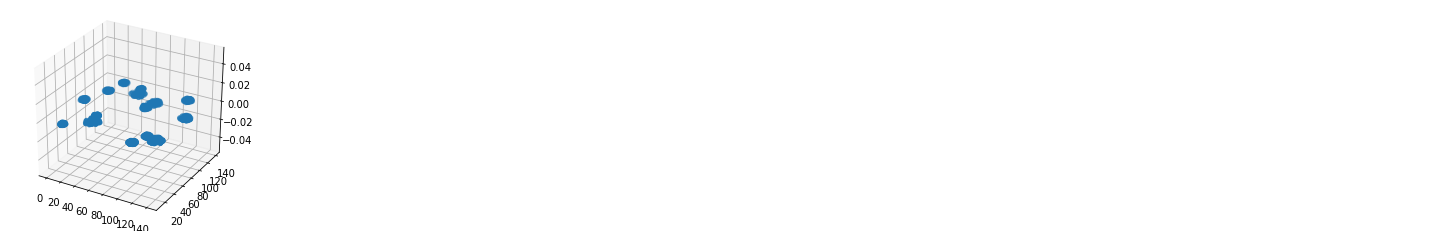

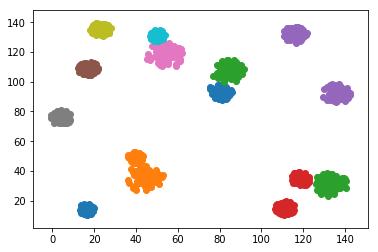

In [0]:
#This run allows intersection with maximum 20%
points = Dataset_Generator(15,2,0,_intersection=5)
points.generate()
points.export("fifteen.csv")

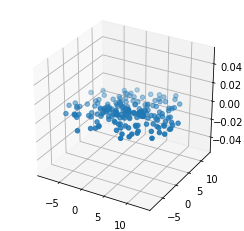

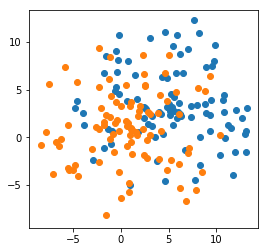

In [0]:
#This run allows intersection with maximum 80%
points = Dataset_Generator(2,2,0,_intersection=80)
points.generate()
points.export("75.csv")

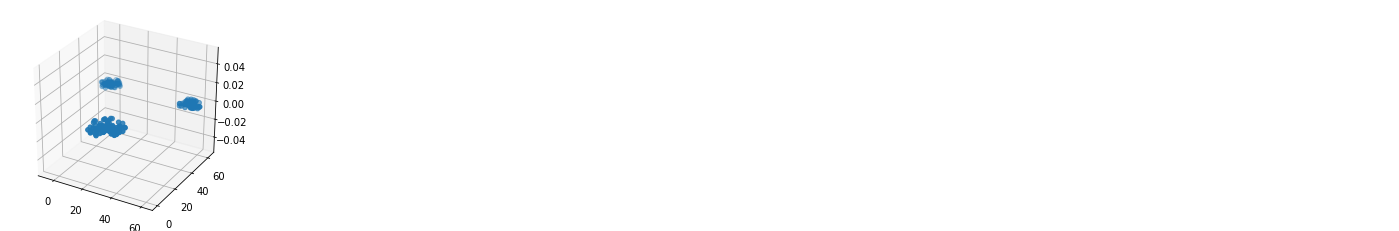

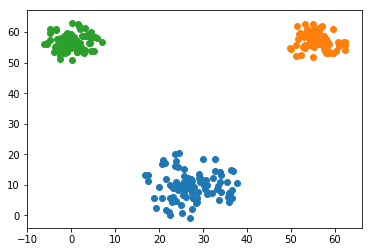

In [0]:
#This run allows cirlces to touch but without intersection
points = Dataset_Generator(3,2,2)
points.generate()
points.export("far.csv")

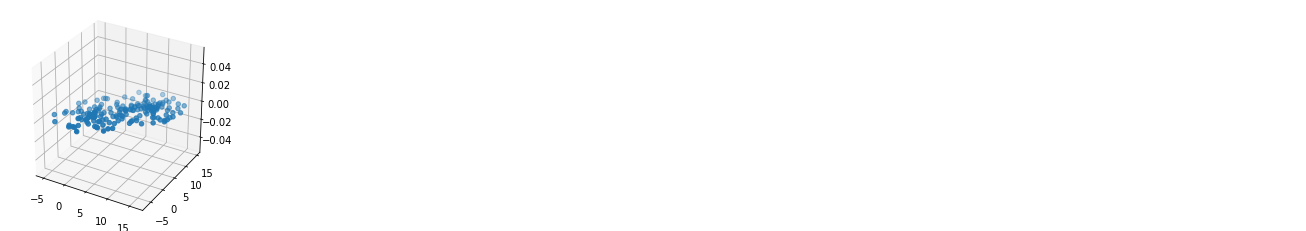

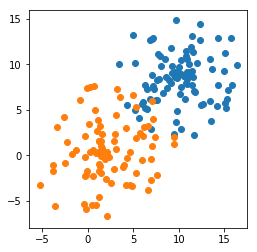

In [0]:
#intersection maximum 20%
_ = Dataset_Generator(2,2,0,_intersection=20)
_.generate()
_.export("binary_close_2.csv")